# Exploratory Data Analysis Exercise
* For this part we will be using the `data/cars.csv` dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline 
import scipy.stats as stats

df = pd.read_csv("data/cars.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Load in the data
* Use the file in the data folder called 'cars.csv'
* Save it as a varible named 'df'
* Display the first 5 rows of our dataframe

In [2]:
# Load data
# this is already done in the above cell

df = pd.read_csv("data/cars.csv")
df.head(5)
# used 5 to be more explicit

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500


# Data clean up part 1.

1. Print the number of duplicate rows we have in our dataframe.

2. Modify our df to have all duplicate rows removed. 

3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

In [3]:
# 1. Print the number of duplicate rows we have in our dataframe.

print(df.duplicated().sum())

720


In [4]:
#  2. Modify our df to have all duplicate rows removed. 

print(df.shape)

df = df.drop_duplicates()

print(df.shape)

(11914, 15)
(11194, 15)


In [5]:
# 3. Do a sanity check to make sure all duplicates have been removed by printing the total number of duplicate rows again.

print(df.duplicated().sum())


0


# Data clean up part 2.
* Which column has the most null values and how many null values does it have?
* Print how long our dataframe is.
* Remove any row that has a null value in it. 
* Do a sanity check and pring how long our dataframe is now that we have removed our null values.

In [6]:
# * Which column has the most null values and how many null values does it have?
df.isnull().sum()

# Engine HP has the most null values
# it has 69 null values

# not sure how we would only print the name of the column with the most and its amount


Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [7]:
df.isnull().sum().idxmax()
# This prints the name but not the number

'Engine HP'

In [8]:
df.isnull().sum().max()
# this prints the number but not the name

# maybe there is a way to do both

69

In [9]:
# * Print how long our dataframe is.
print(len(df))


11194


In [10]:
# * Remove any row that has a null value in it. 

df = df.dropna()
# df.dropna(inplace=True)


# is there a way to check how many rows have na values
# counting a row as 1 wether it has 1 or 5 na values


In [11]:
# * Do a sanity check and pring how long our dataframe is now that we have removed our null values.

print(len(df))

11092


In [12]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

### Make a bar chart that displays how many times each brand of car appears in this data. 
_Brand of car is the `Make` of the car._
* You can achieve this by using value_counts or by a groupby.  Either is fine with me. 

<AxesSubplot:>

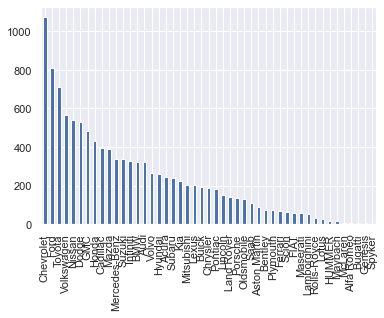

In [13]:
# Make a bar chart that displays how many times each brand of car appears in this data. 

# could maybe use seaborn for this

df["Make"].value_counts().plot(kind="bar")


<AxesSubplot:xlabel='Make'>

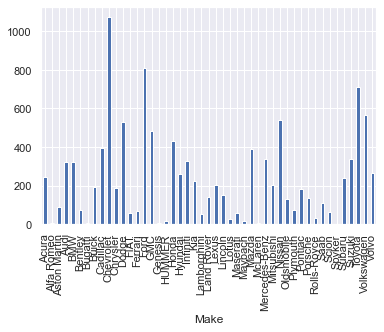

In [14]:
gbm = df.groupby("Make")

gbm["Make"].count().plot(kind="bar")

# for a groupby object we use count with the appropriate column name

# Make the chart more legible, by making it a horizontal bar chart and changing the figure size.  And also sort the values so the bar chart displays from lowest to highest.

<AxesSubplot:title={'center':'Number of Makes'}>

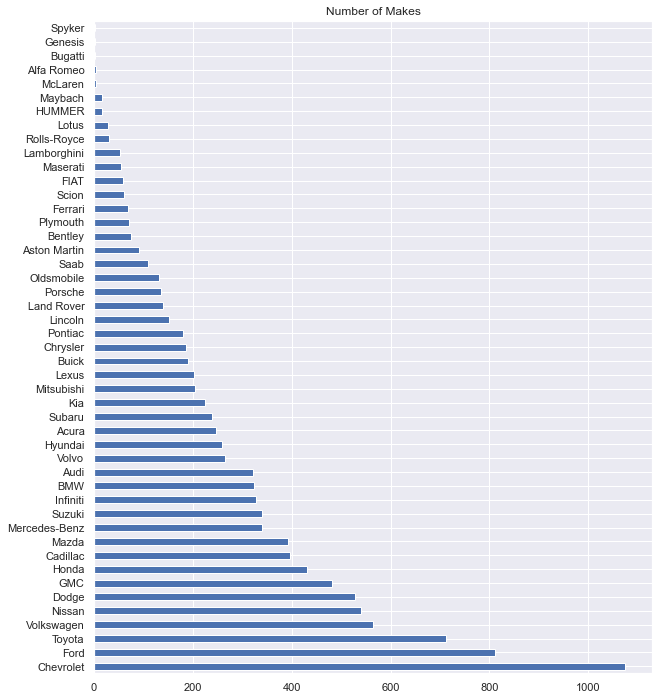

In [15]:
# Make the chart more legible, by making it a horizontal bar chart, sorting the values, and changing the figure size.
df["Make"].value_counts().sort_values(ascending=False).plot(kind="barh", figsize=(10, 12), title="Number of Makes")

# need to set the tiles of the x and y axis

# trial and error to get the size correct
# still hard to read the makes with very low numbers

# it automatically sorted the values from lowest to highest
# but made it explicit with sort_values

# maybe there is a more elegant way to do this

# for some reason the xlabel="Number"
# is not showing so I removed it to make the code line more legible

<AxesSubplot:title={'center':'Number of Makes'}, ylabel='Make'>

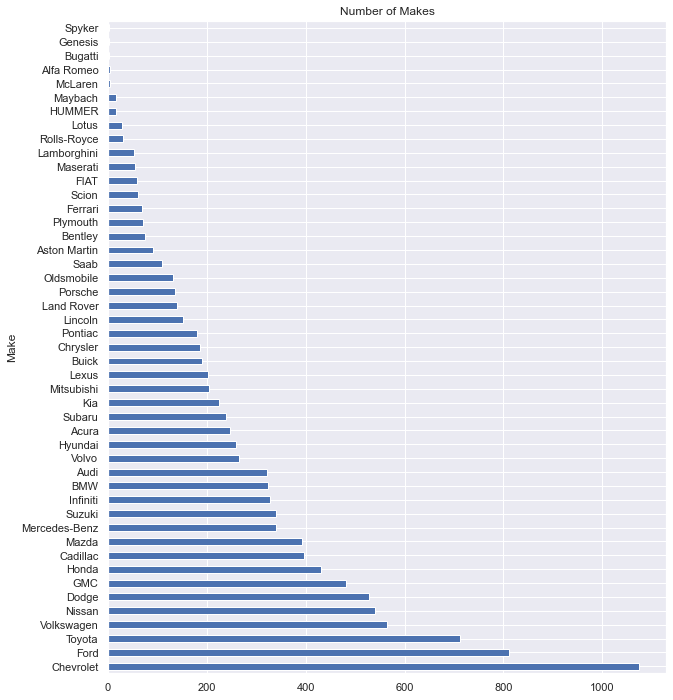

In [16]:
gbm = df.groupby("Make")

gbm["Make"].count().sort_values(ascending=False).plot(kind="barh", figsize=(10, 12), title="Number of Makes")

# for some reason the xlabel="Number"
# is not showing so I removed it to make the code line more legible

# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.
* What's noticeable about it and what do you think the error is...


<AxesSubplot:title={'center':'Average MSRP for each Year'}, xlabel='Year'>

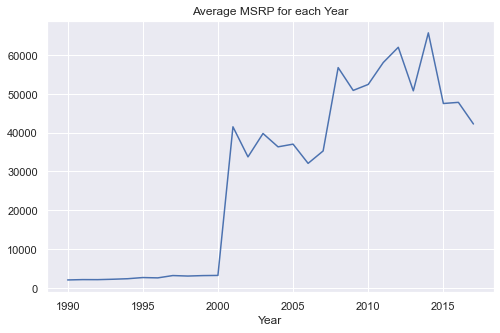

In [17]:
# Make a timeline line chart in which the x-axis is the year, and the y-axis is the average MSRP.


# best to use a groupby object on year I think


gby = df.groupby("Year")

gby["MSRP"].mean().plot(kind="line", figsize=(8, 5), title="Average MSRP for each Year")

# the years were sorted automatically
# I wonder how we would explicitly sort the years though

In [18]:
# the problem is the values in the year 2000 and before are too low
#This is because they were stored differently 

# It seems as though in the years before (and including) 2000, they were counting in tens.
Make a new column that is called `adjusted_price`, that contains all prices, however, for every year before 2000 make it 10x the original MSRP.  
   * Hint; you might need to use our old friend `np.where`

In [19]:
# Make a column where is 10 when year is less than 2000, else 1.


# Multiply the MSRP by the price adjuster.


# the above method seems to have irrelevant steps
# it wants us to make a price_adjuster column

df["adjusted_price"] = np.where(df["Year"] <= 2000, df["MSRP"] * 10, df["MSRP"])


In [20]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,3916,46135,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,3916,40650,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,3916,36350,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,3916,29450,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,3916,34500,34500


In [21]:
df[df["Year"] <= 2000]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
17,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,20000
19,Audi,100,1992,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,20000
21,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,all wheel drive,4.0,Midsize,Sedan,21,16,3105,2000,20000
22,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,4.0,Midsize,Sedan,24,17,3105,2000,20000
23,Audi,100,1993,regular unleaded,172.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,Wagon,20,16,3105,2000,20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11794,Subaru,XT,1991,regular unleaded,145.0,6.0,MANUAL,all wheel drive,2.0,Compact,Coupe,23,16,640,2000,20000
11832,GMC,Yukon Denali,2000,regular unleaded,255.0,8.0,AUTOMATIC,four wheel drive,4.0,Large,4dr SUV,15,11,549,3949,39490
11881,BMW,Z3,2000,regular unleaded,193.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,24,17,3916,4976,49760
11882,BMW,Z3,2000,regular unleaded,193.0,6.0,MANUAL,rear wheel drive,2.0,Compact,2dr Hatchback,24,17,3916,4697,46970


# Replot the new adjusted price.  
* Make the y-axis start at 0 and go up to 100,000

<AxesSubplot:title={'center':'Average MSRP for each Year'}, xlabel='Year'>

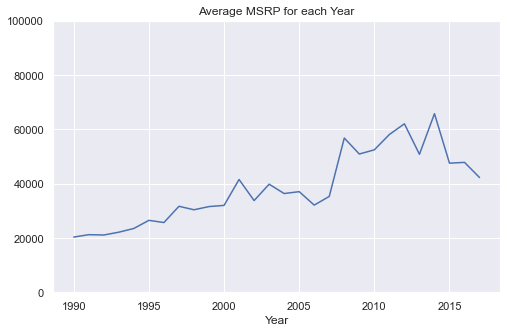

In [22]:
# Plot new prices

gby = df.groupby("Year")

gby["adjusted_price"].mean().plot(kind="line", figsize=(8, 5), title="Average MSRP for each Year", ylim=[0, 100000])



# What are top 5 car makers that make the most expensive cars on average. 
* I only want the top 5, make sure your answer is the top 5 and only the top 5. (hint, you can use .head())
* Use our `adjusted_price` column for this
* Hint; you're going to have to do a .groupby to answer this.

In [23]:
# What are the top 5 car makers make the most expensive cars on average. 

gbm = df.groupby("Make")

average_price = gbm["MSRP"].mean().sort_values(ascending=False)

average_price.head(5)

# I assume we want the name and value


# how to remove scientific number notation

Make
Bugatti        1.757224e+06
Maybach        5.462219e+05
Rolls-Royce    3.511306e+05
Lamborghini    3.315673e+05
Bentley        2.471693e+05
Name: MSRP, dtype: float64

In [24]:
# could reorder it
gbm = df.groupby("Make")

average_price = gbm["MSRP"].mean()

average_price.sort_values(ascending=False).head(5)

Make
Bugatti        1.757224e+06
Maybach        5.462219e+05
Rolls-Royce    3.511306e+05
Lamborghini    3.315673e+05
Bentley        2.471693e+05
Name: MSRP, dtype: float64

In [25]:
# want to try a way without scientific notation as that is easier to read in my opinion


pd.options.display.float_format = '{:.0f}'.format

# could use .2f for cents
# I instead rounded to the dollar

gbm = df.groupby("Make")

average_price = gbm["MSRP"].mean().sort_values(ascending=False)

average_price.head(5)



# pd.reset_option('^display.', silent=True)
# to reset the display


Make
Bugatti       1757224
Maybach        546222
Rolls-Royce    351131
Lamborghini    331567
Bentley        247169
Name: MSRP, dtype: float64

# What are the 5 car makers that have the highest median highway MPG?

In [26]:
# Which car makers have the highest median highway MPG?

gbm = df.groupby("Make")

median_mpg = gbm["highway MPG"].median().sort_values(ascending=False)

median_mpg.head(5)


# I assume we want the name and value

Make
Alfa Romeo    34
FIAT          33
Volkswagen    32
Scion         32
Honda         32
Name: highway MPG, dtype: int64

# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.
* ['Chevrolet', 'Ford', 'Toyota']
* Create a temp_df to store the dataframe of just these values.
* Set the 'hue='Make''.

In [27]:
# Using `sns.histplot`, make histogram of the adjusted_price of just these car makers.

desired_makes = ["Chevrolet", "Ford", "Toyota"]


temp_df = df[df["Make"].isin(desired_makes)]

temp_df

# maybe a better way to do this




,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,adjusted_price
479,Toyota,4Runner,2014,regular unleaded,270,6,AUTOMATIC,rear wheel drive,4,Midsize,4dr SUV,23,17,2031,41365,41365
480,Toyota,4Runner,2014,regular unleaded,270,6,AUTOMATIC,rear wheel drive,4,Midsize,4dr SUV,23,17,2031,35740,35740
481,Toyota,4Runner,2014,regular unleaded,270,6,AUTOMATIC,four wheel drive,4,Midsize,4dr SUV,22,17,2031,37615,37615
482,Toyota,4Runner,2014,regular unleaded,270,6,AUTOMATIC,four wheel drive,4,Midsize,4dr SUV,22,17,2031,34695,34695
483,Toyota,4Runner,2014,regular unleaded,270,6,AUTOMATIC,four wheel drive,4,Midsize,4dr SUV,22,17,2031,35725,35725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11827,Toyota,Yaris,2017,regular unleaded,106,4,MANUAL,front wheel drive,2,Compact,2dr Hatchback,36,30,2031,15250,15250
11828,Toyota,Yaris,2017,regular unleaded,106,4,AUTOMATIC,front wheel drive,4,Compact,4dr Hatchback,35,30,2031,16375,16375
11829,Toyota,Yaris,2017,regular unleaded,106,4,AUTOMATIC,front wheel drive,4,Compact,4dr Hatchback,35,30,2031,17285,17285
11830,Toyota,Yaris,2017,regular unleaded,106,4,AUTOMATIC,front wheel drive,4,Compact,4dr Hatchback,35,30,2031,18000,18000


In [28]:
temp_df["Make"].value_counts()
# check to make sure we only have the desired makes

Chevrolet    1075
Ford          811
Toyota        713
Name: Make, dtype: int64

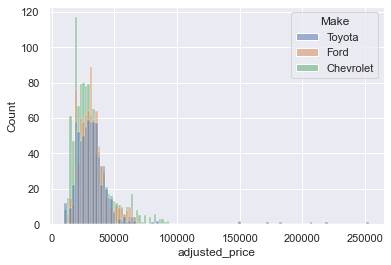

In [29]:
ax = sns.histplot(data=temp_df, x="adjusted_price", hue="Make")

# Remake the same histogram, but limit the x-axis from 0 to 100,000

(0.0, 100000.0)

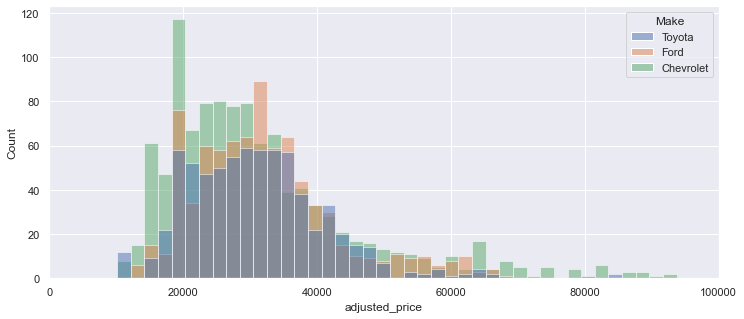

In [30]:
# Remake the same histogram, but limit the x-axis from 0 to 100,000

plt.figure(figsize=(12, 5))

ax = sns.histplot(data=temp_df, x="adjusted_price", hue="Make")

ax.set_xlim(0, 100000)

# is there an easy way to make the figsize bigger

# binrange did not work as expected to this was better

# Plot the relationship between Engine HP and highway MPG

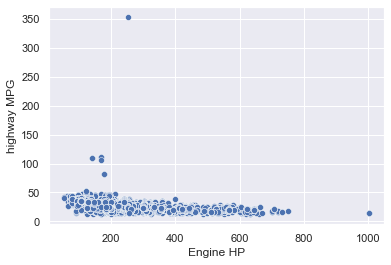

In [31]:
# Plot the relationship between Engine HP and highway MPG

# I assume this is for all Makes and not just the ones from the previous question

ax = sns.scatterplot(data=df, x="Engine HP", y="highway MPG");


# Using `sns.boxplot`, create a boxplot for the 'Engine HP'

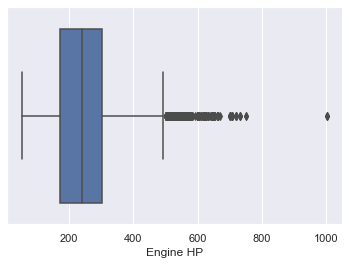

In [32]:
# create a boxplot for the 'Engine HP'

ax = sns.boxplot(data=df, x="Engine HP");

# Make another boxplot for highway MPG

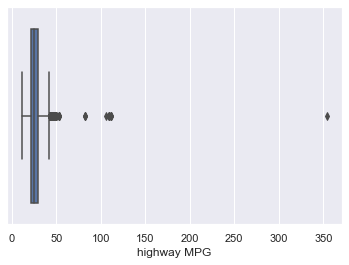

In [33]:
# create a boxplot for the 'highway MPG'

ax = sns.boxplot(data=df, x="highway MPG");

# Remove any  outliers from Engine HP and highway MPG 

<img src='https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png' width=500>

* Outliers meaning values that are outside 1.5x the Inter Quartile Range (see image above).
* For each column (Engine HP and highway MPG):
* Calculate the 0.25 and 0.75 Quantiles
* Calculate the Inter Quartile Range (IQR)
* Create condition mask for the values that are outliers below (in the 'Minimum' range).
* Create condition mask for the values that are outliers above (in the 'Maximum' range).
* Filter the dataframe to remove any values that are in the above section _OR_ the below section. (hint; it may be easier to use the inverse selection '~'.
* Make the same boxplots of Engine HP and Highway MPG as before but with the this dataframe.

In [34]:
# Remove any  outliers from Engine HP and highway MPG 

Q1Engine = df["Engine HP"].quantile(0.25)


Q3Engine = df["Engine HP"].quantile(0.75)


IQREngine = Q3Engine - Q1Engine

outliers_below_engine = df["Engine HP"] < (Q1Engine - (1.5 * IQREngine))

outliers_above_engine = df["Engine HP"] > (Q3Engine + (1.5 * IQREngine))


In [35]:
Q1MPG = df["highway MPG"].quantile(0.25)


Q3MPG = df["highway MPG"].quantile(0.75)

# mayne add underscores to the variable names


IQRMPG = Q3MPG - Q1MPG

outliers_below_MPG = df["highway MPG"] < (Q1MPG - (1.5 * IQRMPG))

outliers_above_MPG = df["highway MPG"] > (Q3MPG + (1.5 * IQRMPG))

In [36]:
df_no_outliers =  df[ ~(outliers_above_engine | outliers_below_engine | outliers_above_MPG | outliers_below_MPG) ]

# Remake the boxplots for both Engine HP and highway MPG


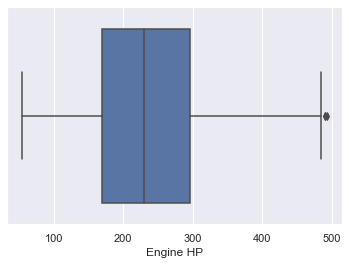

In [37]:
# Engine HP boxplot

ax = sns.boxplot(data=df_no_outliers, x="Engine HP");

# for some reason it looks like 2 outliers still stayed
# this should be fine though

# maybe this is a rounding error
# or maybe this is caused by the change in the IQR range by removing values

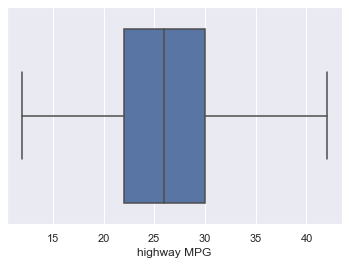

In [38]:
# highway MPG boxplot

ax = sns.boxplot(data=df_no_outliers, x="highway MPG");

# Make a scatter plot of Engine HP vs highway MPG

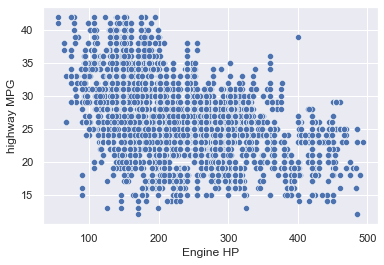

In [39]:
# Make a scatter plot of Engine HP vs highway MPG


ax = sns.scatterplot(data=df_no_outliers, x="Engine HP", y="highway MPG");

# What does this plot tell you about how Engine HP affects highway MPG?

In [40]:
# What does this plot tell you about how Engine HP affects highway MPG?

print("There is a moderate negative correlation")

# this is because it looks like when Engine HP goes up highway MPG goes down

There is a moderate negative correlation


# Using a pairplot, display all of the linear relationship.
* Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

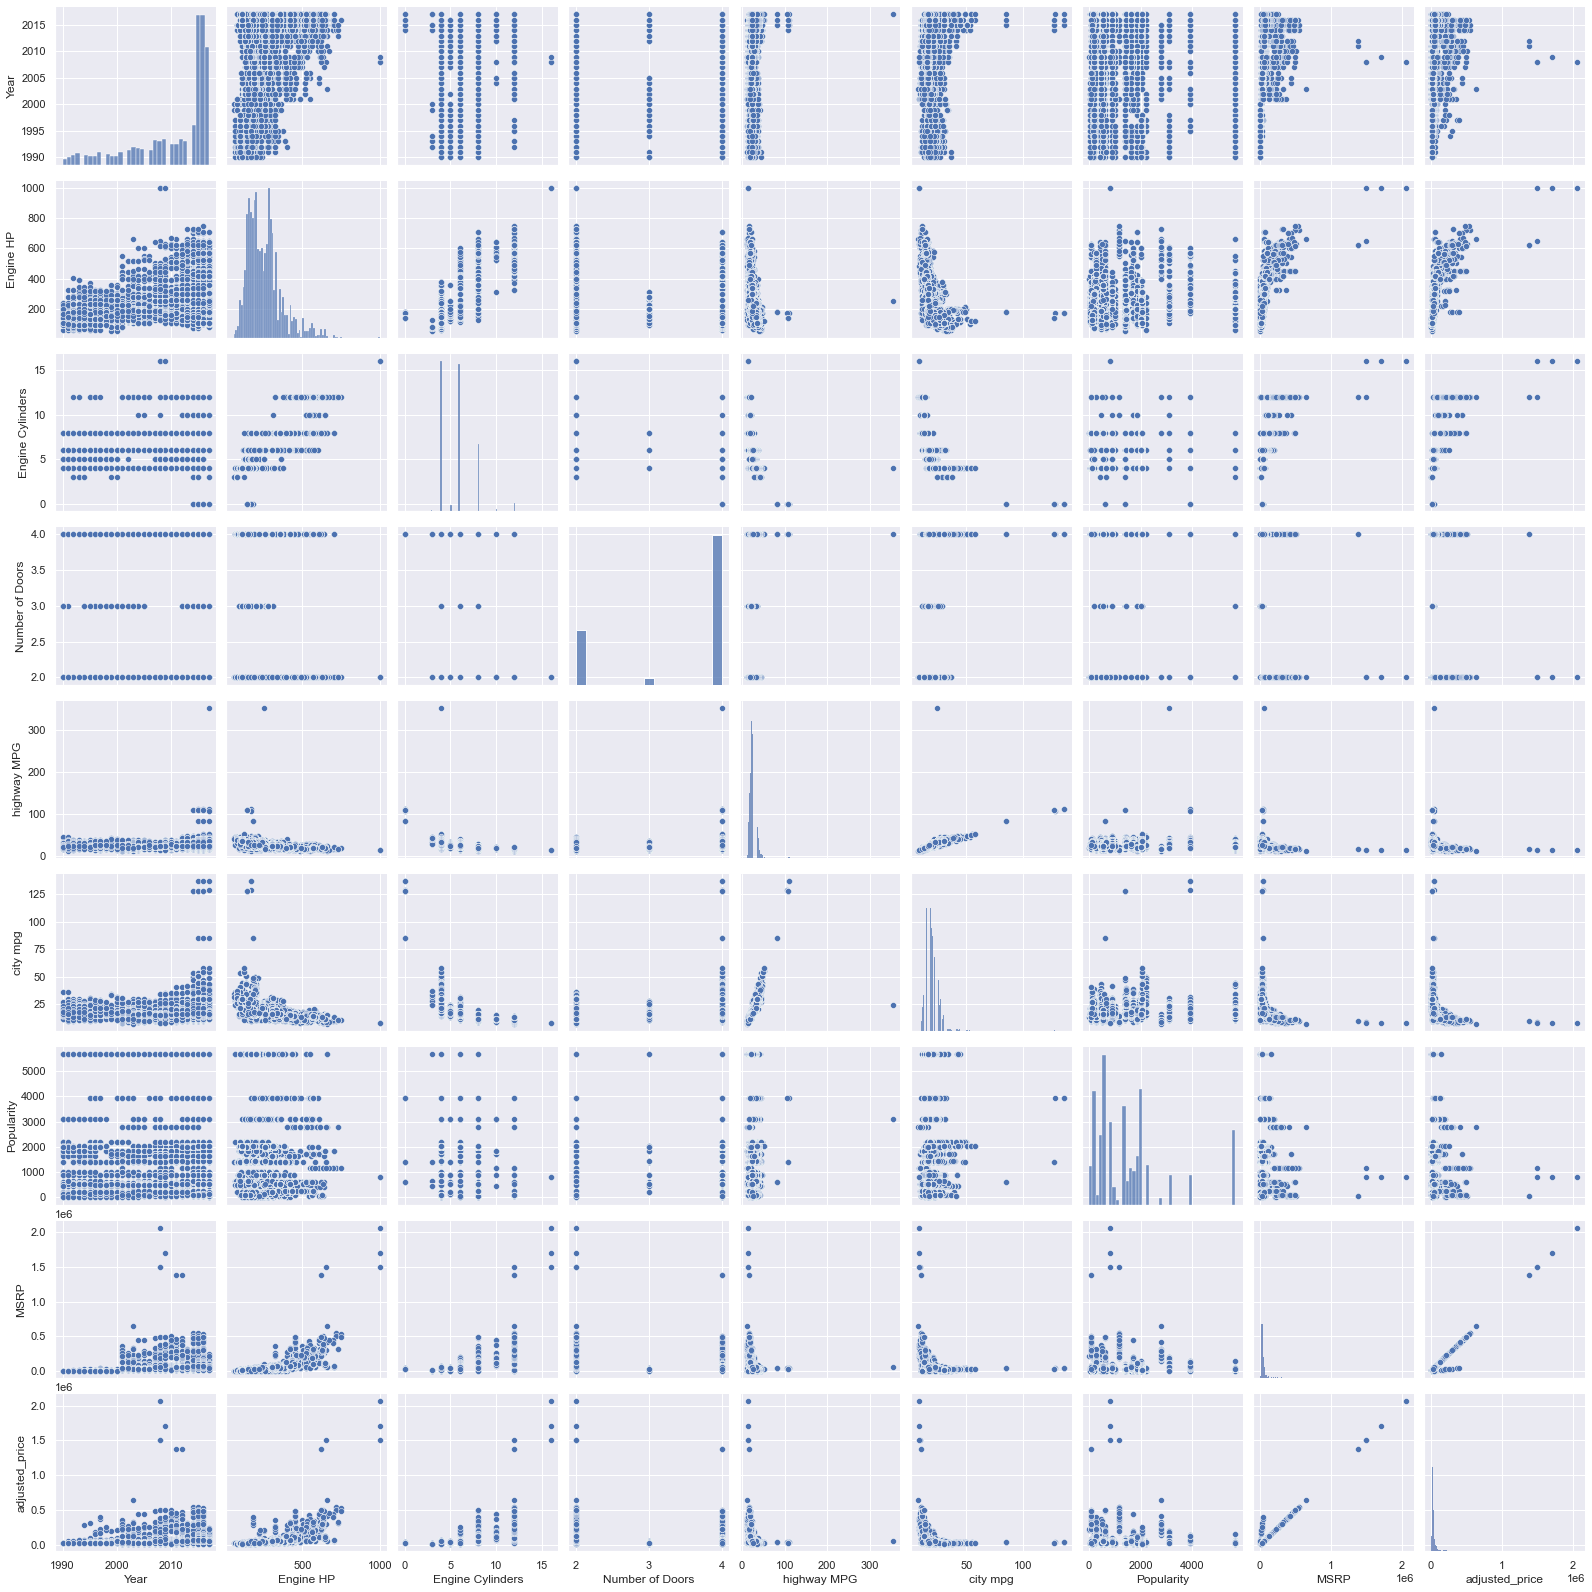

In [41]:
# Using a pairplot, display all of the linear relationship.

sns.pairplot(df);

In [42]:
# * Which variables look like they have the strongest linear relationship (Besides MSRP and adjusted_price).

# to me it looks like city mpg and highway mpg have the strongest linear relationship or correlation

# Find which features actually have the strongest linear relationship using correlations.
* Make a heatmap plot of all of the correlations in our dataset.
* Change the figure size of our heatmap plot to be 8x8
* __Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.__

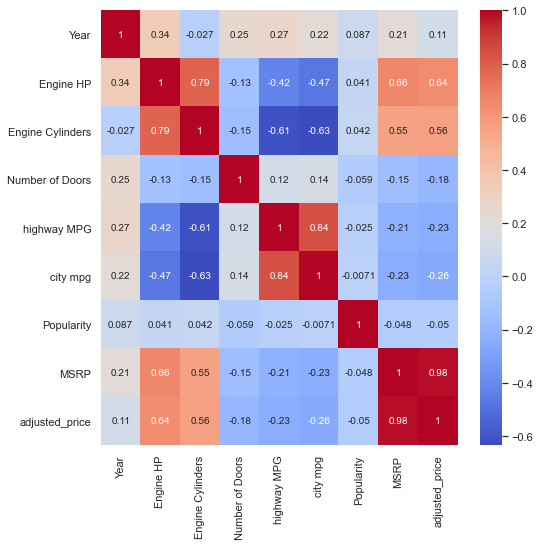

In [43]:
# * Make a heatmap plot of all of the correlations in our dataset.
# * Change the figure size of our heatmap plot to be 8x8

plt.figure(figsize=(8, 8))

ax = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [44]:
# Which feature does Engine HP have the strongest relationship with, and why do you think that relationship exists.

print("Engine HP is most strongly correlated with Engine Cylinders")
print("This makes sense because the more cylinders an engine has the more powerful it should be")

Engine HP is most strongly correlated with Engine Cylinders
This makes sense because the more cylinders an engine has the more powerful it should be


# [EXTRA CREDIT] 
* In the column names, replace all the spaces with an underscore, and make them all lowercase as well


In [45]:
# * In the column names, replace all the spaces with an underscore, and make them all lowercase as well



In [46]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Vehicle Size', 'Vehicle Style', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP', 'adjusted_price'],
      dtype='object')

In [47]:


# I think I have to do them one at a time

# I tried chaining and I got an error

In [48]:
df.columns = df.columns.str.lower()

In [49]:
df.columns

Index(['make', 'model', 'year', 'engine fuel type', 'engine hp',
       'engine cylinders', 'transmission type', 'driven_wheels',
       'number of doors', 'vehicle size', 'vehicle style', 'highway mpg',
       'city mpg', 'popularity', 'msrp', 'adjusted_price'],
      dtype='object')

In [50]:
df.columns = df.columns.str.replace(" ", "_")

In [51]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'vehicle_size', 'vehicle_style', 'highway_mpg',
       'city_mpg', 'popularity', 'msrp', 'adjusted_price'],
      dtype='object')